In [31]:
import edward as ed
import tensorflow as tf

from edward.models import Normal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [43]:
# MODEL
z = Normal(mu=-3.1415, sigma=10.)

# INFERENCE
qz = Normal(mu=tf.Variable(tf.random_normal([])),
            sigma=tf.nn.softplus(tf.Variable(tf.random_normal([]))))

inference = ed.KLqp({z: qz})
inference.initialize(n_iter=500, n_samples=20, n_minibatch=10, logdir='train')

tf.global_variables_initializer().run()

Iteration 500 [100%]: Loss = 0.000


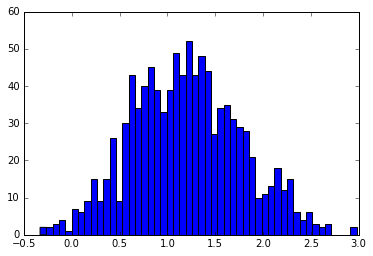

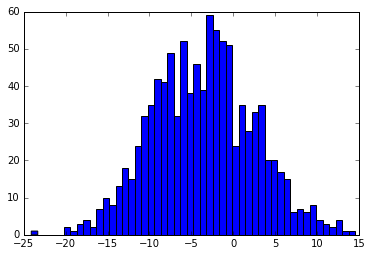

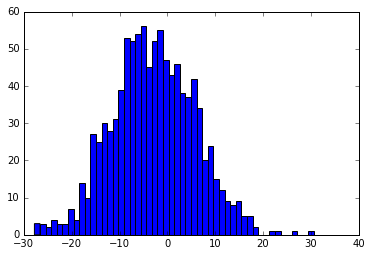

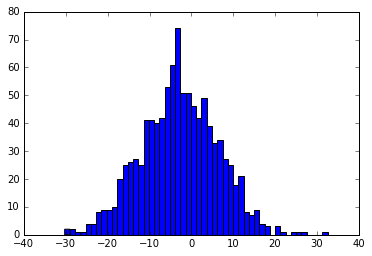

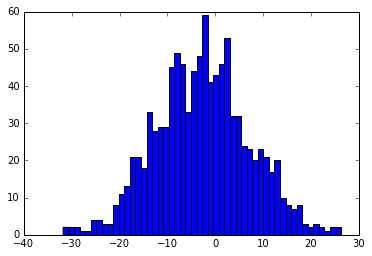

In [44]:
for _ in range(inference.n_iter):
    info_dict = inference.update()
    if _ % 100 == 0:
        tmp = qz.sample(sample_shape=(1000))
        plt.hist(tmp.eval(),50);
        plt.figure()
inference.print_progress(info_dict)

In [45]:
qz.mean().eval(), qz.std().eval()

(-3.1415005, 9.894968)